In [1]:
%load_ext autoreload
%autoreload 2
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [13]:
from game.components import Game, Player, PlayerAlgorithm
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

# Minimax depth 1 vs Random

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.38it/s]


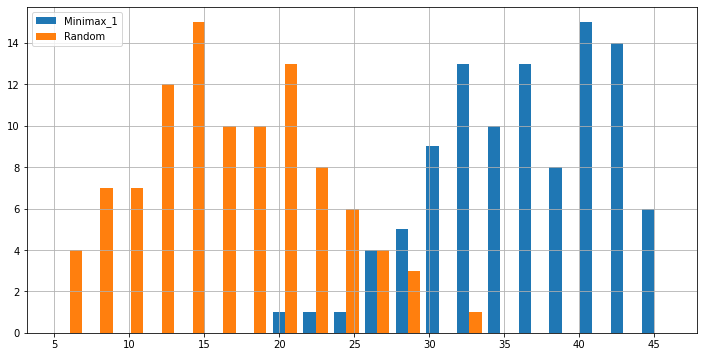

In [3]:
experiments = 100
a_1_scores, a_2_scores = [], []

for i in tqdm(range(experiments)):
    p1 = Player("Minimax_1", algorithm=PlayerAlgorithm.MINIMAX, minimax_depth=1)
    p2 = Player("Random", algorithm=PlayerAlgorithm.RANDOM)
    game = Game(p1, p2, verbose=False)
    game.run()
    a_1_scores.append(game.player_1.home_well.num_stones)
    a_2_scores.append(game.player_2.home_well.num_stones)
    
plt.figure(figsize=(12,6))
plt.hist([a_1_scores, a_2_scores], bins=20, label=[p1.name, p2.name])
plt.legend()
plt.grid()
plt.show()

no dice, even just playing smart one move at a time, you will probably beat random.

But what about 1 move ahead vs 3 moves ahead?

# Minimax 1 vs Minimax 3

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:00<00:00,  1.20s/it]


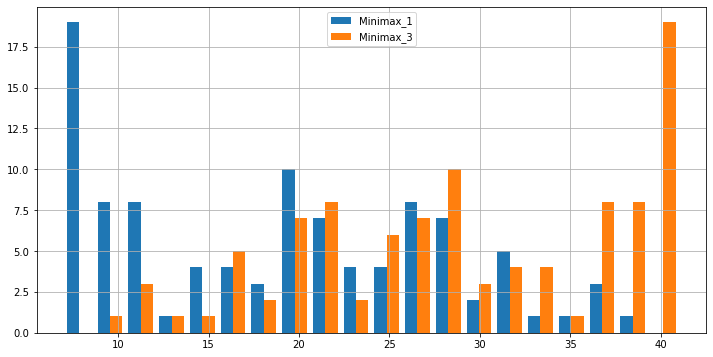

In [4]:
experiments = 100
a_1_scores, a_2_scores = [], []

for i in tqdm(range(experiments)):
    p1 = Player("Minimax_1", algorithm=PlayerAlgorithm.MINIMAX, minimax_depth=1)
    p2 = Player("Minimax_3", algorithm=PlayerAlgorithm.MINIMAX, minimax_depth=3)
    game = Game(p1, p2, verbose=False)
    game.run()
    a_1_scores.append(game.player_1.home_well.num_stones)
    a_2_scores.append(game.player_2.home_well.num_stones)

plt.figure(figsize=(12,6))
plt.hist([a_1_scores, a_2_scores], bins=20, label=[p1.name, p2.name])
plt.legend()
plt.grid()
plt.show()

Okay so we can see that in Mancala, playing a few moves ahead will give you an advantage over a player playing just one move at a time.

Question is... can you beat an algorithm looking 3 moves ahead?

# Minimax 3 vs Human

In [14]:
p1 = Player("Minimax_3", algorithm=PlayerAlgorithm.MINIMAX, minimax_depth=3)
p2 = Player("Human", algorithm=PlayerAlgorithm.HUMAN)
game = Game(p2, p1, verbose=True)
game.run()

Tossing coin to determine first player...
Player 'Human' will go first.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 4 )( 4 )( 4 )( 4 )( 4 )( 4 )  |  
( 0 )                              ( 0 )
  |  ( 4 )( 4 )( 4 )( 4 )( 4 )( 4 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 5


Human secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 4 )( 4 )( 4 )( 5 )( 5 )( 5 )  |  
( 0 )                              ( 1 )
  |  ( 4 )( 4 )( 4 )( 4 )( 4 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 5, which had 4 stones in it.
Minimax_3 secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 4 )( 4 )( 5 )( 5 )( 5 )  |  
( 1 )                              ( 1 )
  |  ( 5 )( 5 )( 5 )( 4 )( 4 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 1


Human secured 1 stones.
Human plays again...
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 4 )( 4 )( 5 )( 5 )( 5 )  |  
( 1 )                              ( 2 )
  |  ( 5 )( 0 )( 6 )( 5 )( 5 )( 1 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 5


Human secured 1 stones.
Human plays again...
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 4 )( 4 )( 5 )( 5 )( 5 )  |  
( 1 )                              ( 3 )
  |  ( 5 )( 0 )( 6 )( 5 )( 5 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 0


What a play! Human secured 6 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 4 )( 4 )( 5 )( 5 )( 0 )  |  
( 1 )                              ( 9 )
  |  ( 0 )( 1 )( 7 )( 6 )( 6 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 3, which had 4 stones in it.
Minimax_3 secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 5 )( 0 )( 5 )( 5 )( 0 )  |  
( 2 )                              ( 9 )
  |  ( 1 )( 1 )( 7 )( 6 )( 6 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 2


Human secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 5 )( 0 )( 6 )( 6 )( 1 )  |  
( 2 )                              ( 10 )
  |  ( 1 )( 1 )( 0 )( 7 )( 7 )( 1 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 5, which had 1 stones in it.
Minimax_3 secured 1 stones.
Minimax_3 plays again...
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 5 )( 0 )( 6 )( 6 )( 1 )  |  
( 3 )                              ( 10 )
  |  ( 1 )( 1 )( 0 )( 7 )( 7 )( 1 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 1, which had 6 stones in it.
Minimax_3 secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 6 )( 1 )( 7 )( 0 )( 1 )  |  
( 4 )                              ( 10 )
  |  ( 2 )(

Enter the well id to play [0-5]
 5


Human secured 1 stones.
Human plays again...
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 6 )( 1 )( 7 )( 0 )( 1 )  |  
( 4 )                              ( 11 )
  |  ( 2 )( 1 )( 0 )( 7 )( 7 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 1


Human secured 2 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 6 )( 0 )( 7 )( 0 )( 1 )  |  
( 4 )                              ( 13 )
  |  ( 2 )( 0 )( 0 )( 7 )( 7 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 5, which had 1 stones in it.
Minimax_3 secured 1 stones.
Minimax_3 plays again...
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 6 )( 0 )( 7 )( 0 )( 1 )  |  
( 5 )                              ( 13 )
  |  ( 2 )( 0 )( 0 )( 7 )( 7 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 0, which had 1 stones in it.
What a play! Minimax_3 secured 8 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 6 )( 0 )( 7 )( 0 )( 0 )  |  
( 13 )  

Enter the well id to play [0-5]
 0


Human secured 1 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 6 )( 0 )( 7 )( 0 )( 0 )  |  
( 13 )                              ( 14 )
  |  ( 0 )( 1 )( 0 )( 7 )( 0 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 2, which had 7 stones in it.
Minimax_3 secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 7 )( 1 )( 0 )( 0 )( 0 )  |  
( 14 )                              ( 14 )
  |  ( 1 )( 2 )( 1 )( 7 )( 0 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 0


Human secured 0 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 7 )( 1 )( 0 )( 0 )( 0 )  |  
( 14 )                              ( 14 )
  |  ( 0 )( 3 )( 1 )( 7 )( 0 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 5, which had 1 stones in it.
Minimax_3 secured 1 stones.
Minimax_3 plays again...
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 0 )( 7 )( 1 )( 0 )( 0 )( 0 )  |  
( 15 )                              ( 14 )
  |  ( 0 )( 3 )( 1 )( 7 )( 0 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 4, which had 7 stones in it.
Minimax_3 secured 1 stones.
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 0 )( 1 )( 0 )( 0 )( 0 )  |  
( 16 )                              ( 14 )
  |  ( 1

Enter the well id to play [0-5]
 1


Human secured 1 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 0 )( 1 )( 0 )( 0 )( 0 )  |  
( 16 )                              ( 15 )
  |  ( 1 )( 0 )( 3 )( 9 )( 2 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 3, which had 1 stones in it.
Minimax_3 secured 1 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 0 )( 0 )( 0 )( 0 )( 0 )  |  
( 17 )                              ( 15 )
  |  ( 1 )( 0 )( 3 )( 9 )( 2 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human



Enter the well id to play [0-5]
 0


Human secured 1 stones, with a capture!
   Minimax_3
      5    4    3    2    1    0  
----------------------------------------
  |  ( 1 )( 0 )( 0 )( 0 )( 0 )( 0 )  |  
( 17 )                              ( 16 )
  |  ( 0 )( 0 )( 3 )( 9 )( 2 )( 0 )  |  
----------------------------------------
      0    1    2    3    4    5  
   Human

Player Minimax_3 plays well 5, which had 1 stones in it.
Minimax_3 secured 1 stones.
Minimax_3 plays again...
Human score: 30
Minimax_3 score: 18
